# tg pileup zero order

In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


In [2]:
/bin/rm -rf 1927
download_chandra_obsid 1927 evt1
mv -fv 1927/secondary/*evt1.fits.gz ./
gunzip -f *.fits.gz


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt1     fits       51 Mb  ####################          < 1 s  104016.6 kb/s

'1927/secondary/acisf01927_000N004_evt1.fits.gz' -> './acisf01927_000N004_evt1.fits.gz'


---
# what's the problem?

[1] 42488
[1]+  Done                    ds9 acisf01927_000N004_evt1.fits -scale log -zoom 8 -pan to 4166 4119 physical -saveimage png ds9_01.png


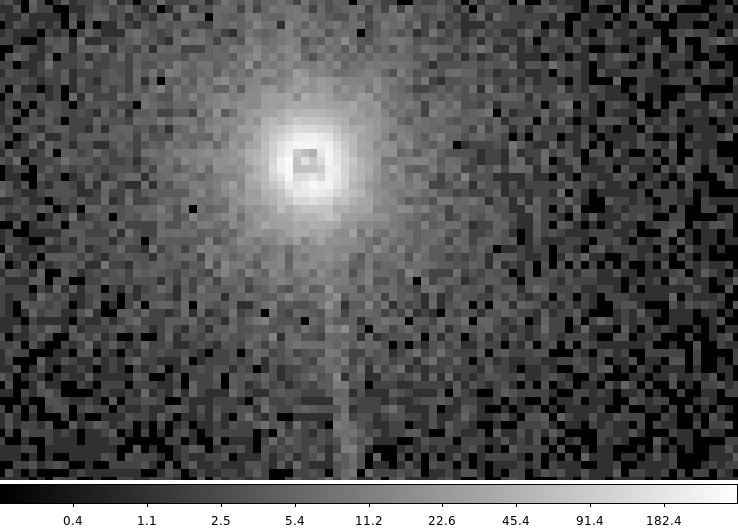

In [3]:
ds9 acisf01927_000N004_evt1.fits -scale log -zoom 8 \
  -pan to 4166 4119 physical \
  -saveimage png ds9_01.png &
sleep 10
xpaset -p ds9 quit

display < ds9_01.png

## tgdetect

In [4]:
pset tgdetect infile=acisf01927_000N004_evt1.fits
pset tgdetect outfile=tgd.fits
tgdetect mode=h clobber=yes


[1] 42707
[1]+  Done                    ds9 acisf01927_000N004_evt1.fits -scale log -zoom 8 -pan to 4166 4119 physical -regions point.reg -saveimage png ds9_02.png


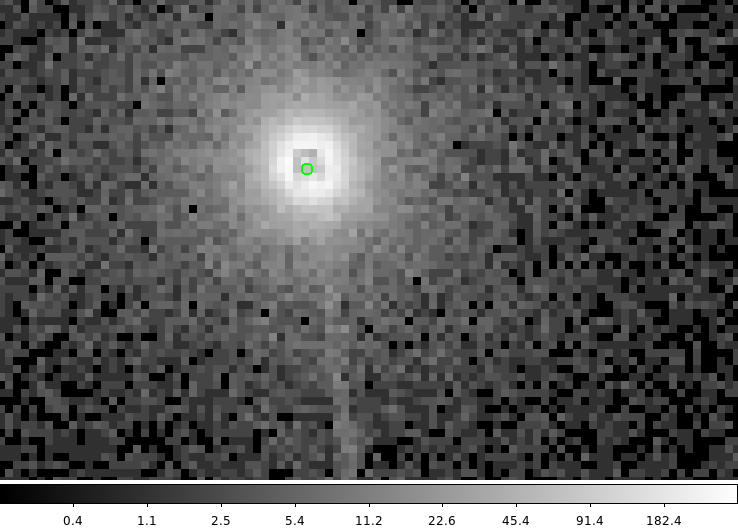

In [5]:
x=`dmkeypar tgd.fits x echo+`
y=`dmkeypar tgd.fits y echo+`
cat << EOM > point.reg
point(${x},${y}) # point=circle width=2
EOM

ds9 acisf01927_000N004_evt1.fits -scale log -zoom 8 \
  -pan to 4166 4119 physical \
  -regions point.reg \
  -saveimage png ds9_02.png &
sleep 10
xpaset -p ds9 quit

display < ds9_02.png

## tg_findzo

In [6]:
pset tg_findzo infile=acisf01927_000N004_evt1.fits 
pset tg_findzo outfile=fzo.fits 
tg_findzo mode=h clob+


/export/CIAOT/ciaot_install/20211019/ciao-4.14/binexe/tg_findzo:337: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  comP=dmColumnCreate(o_blk,"COMPONENT",np.int,unit="",desc="index of region components")


[1] 42813
[1]+  Done                    ds9 acisf01927_000N004_evt1.fits -scale log -zoom 8 -pan to 4166 4119 physical -regions point.reg -regions point_fzo.reg -saveimage png ds9_03.png


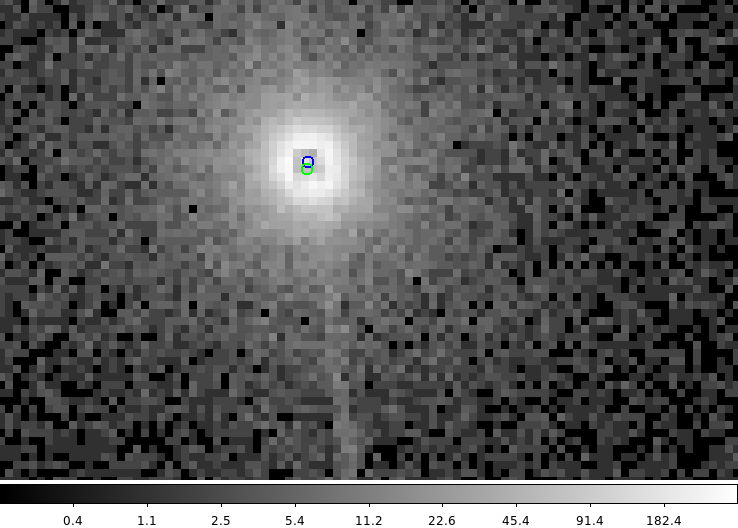

In [7]:
x=`dmkeypar fzo.fits x echo+`
y=`dmkeypar fzo.fits y echo+`
cat << EOM > point_fzo.reg
point(${x},${y}) # point=circle width=2 color=blue
EOM

ds9 acisf01927_000N004_evt1.fits -scale log -zoom 8 \
  -pan to 4166 4119 physical \
  -regions point.reg \
  -regions point_fzo.reg \
  -saveimage png ds9_03.png &
sleep 10
xpaset -p ds9 quit

display < ds9_03.png

## tg_create_mask

In [8]:
pset tg_create_mask infile= acisf01927_000N004_evt1.fits
pset tg_create_mask outfile=tg_mask.fits
pset tg_create_mask input_pos_tab= fzo.fits
tg_create_mask mode=h clob+


In [9]:
dmlist tg_mask.fits"[cols shape,sky]" data

 
--------------------------------------------------------------------------------
Data for Table Block REGION
--------------------------------------------------------------------------------
 
ERROR: regCreateCircle() requires an input radius.ERROR: regCreateBox() requires two (2) radii.ERROR: regCreateBox() requires two (2) radii.Region Block: Empty region
ROW    SHAPE              SKY(X,Y)
 
     1 circle             (     4158.3676757812,     4128.8017578125)
     2 rotbox             (     4099.9145507812,     4115.2641601562)
     3 rotbox             (     4098.4541015625,     4125.5781250)


[1] 42858
[1]+  Done                    ds9 acisf01927_000N004_evt1.fits -region tg_mask.fits -scale log -pan to 4166 4119 physical -saveimage png ds9_04.png


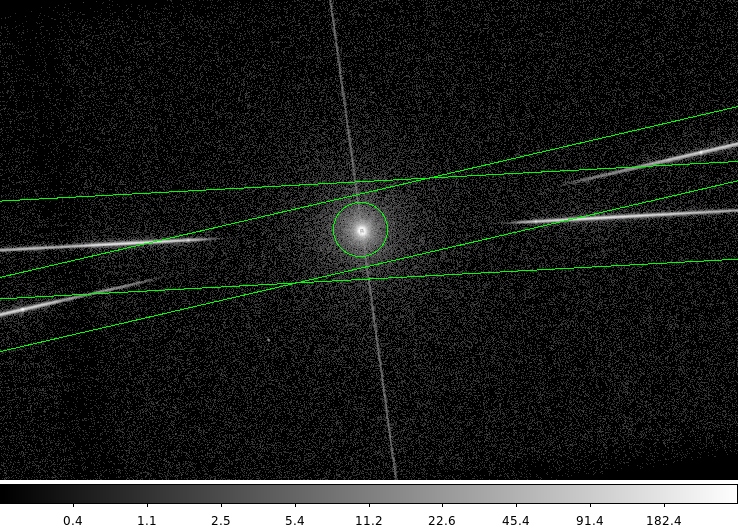

In [10]:
ds9 acisf01927_000N004_evt1.fits -region tg_mask.fits \
  -scale log \
    -pan to 4166 4119 physical \
  -saveimage png ds9_04.png &
sleep 10
xpaset -p ds9 quit

display < ds9_04.png


# Cleanup


In [11]:
/bin/rm -rf 1927 
/bin/rm -f acisf*
